<a href="https://colab.research.google.com/github/PYFTS/notebooks/blob/master/Partitioners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring the Universe of Discourse Partitioners

## Environment Setup

### Library install/update

In [1]:
# !pip install -U --force-reinstall --no-deps -e git+https://git.athene.tech/sam/pyFTS.git#egg=pyFTS

### External libraries import

In [2]:
import warnings
warnings.filterwarnings('ignore')


import matplotlib.pylab as plt

%pylab inline


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### Common pyFTS imports 

In [3]:
from pyFTS.partitioners import KMeans, Grid, FCM, Huarng, Entropy, Util as pUtil
from pyFTS.common import Membership as mf
from pyFTS.benchmarks import benchmarks as bchmk
from pyFTS.data import Enrollments

2024-08-08 12:33:54.147886: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-08 12:33:54.168752: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-08 12:33:54.175031: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-08 12:33:54.191648: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-08 12:33:55.150180: W tensorflow/comp

### Common data transformations

In [4]:
from pyFTS.common import Transformations

tdiff = Transformations.Differential(1)

## Dataset

### Data Loading

In [5]:
from pyFTS.data import TAIEX

dataset = TAIEX.get_data()
dataset_diff = tdiff.apply(dataset)

### Visualization

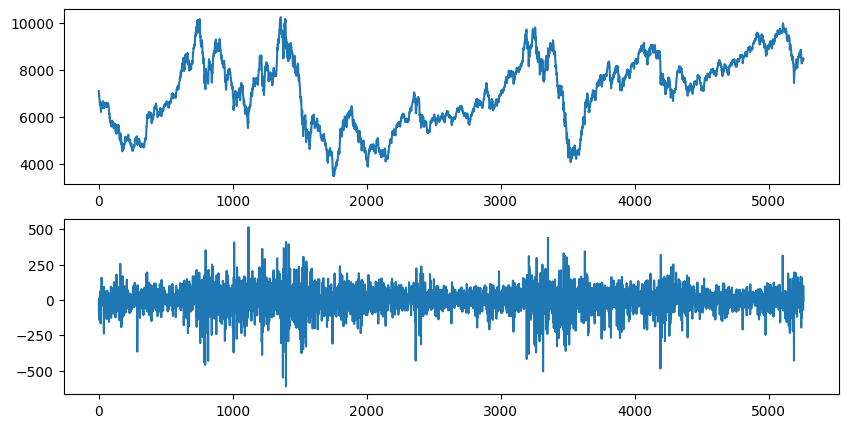

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=[10,5])
ax[0].plot(dataset)
ax[1].plot(dataset_diff)

## Exploring partitioning schemes

### Same method with different membership functions

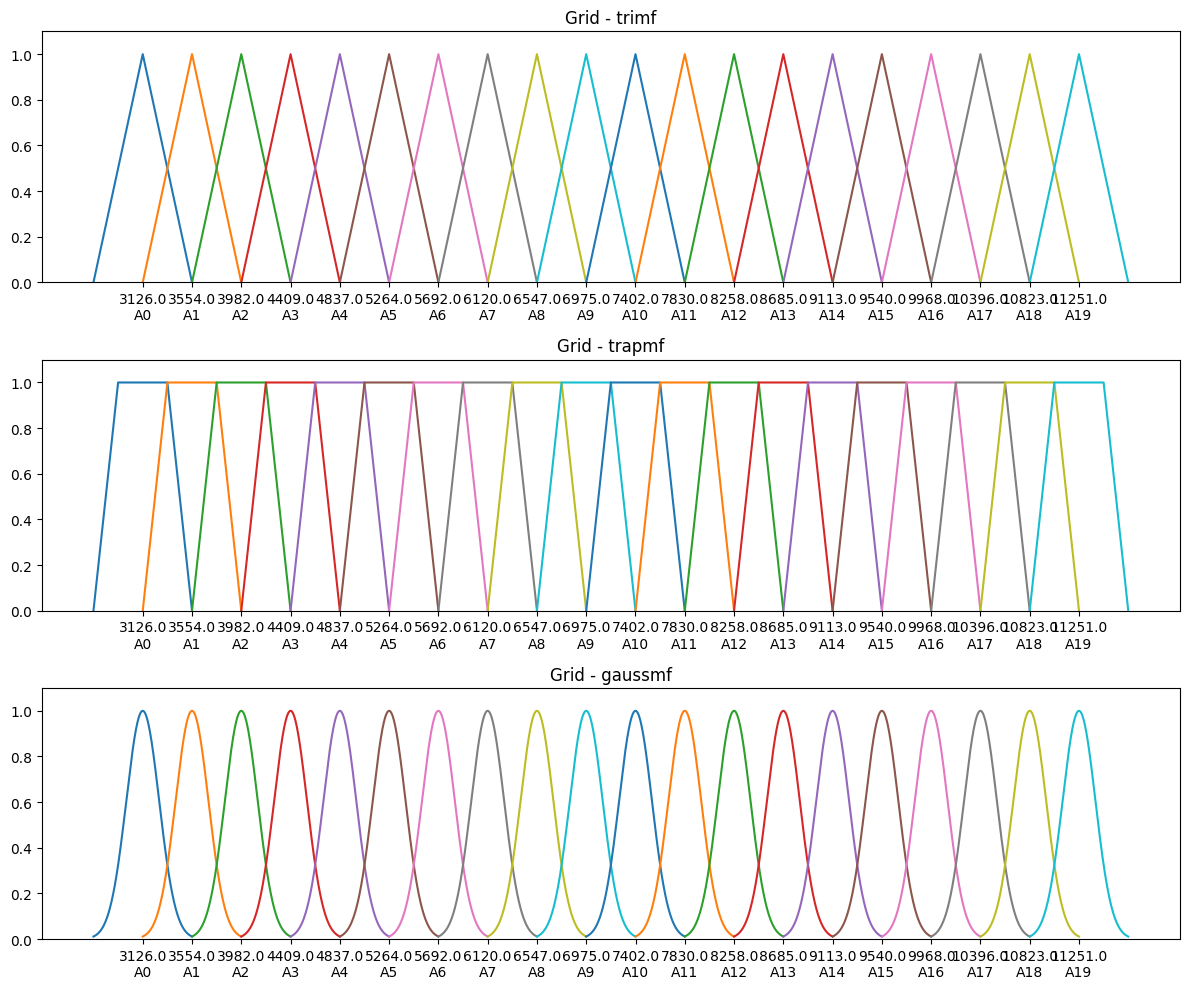

In [7]:
part = pUtil.explore_partitioners(dataset, 20, methods=[Grid.GridPartitioner], 
                                  mf=[mf.trimf, mf.trapmf, mf.gaussmf])

In [8]:
# for p in part:
#     print(p)

### Same mathod with different membership functions and transformation

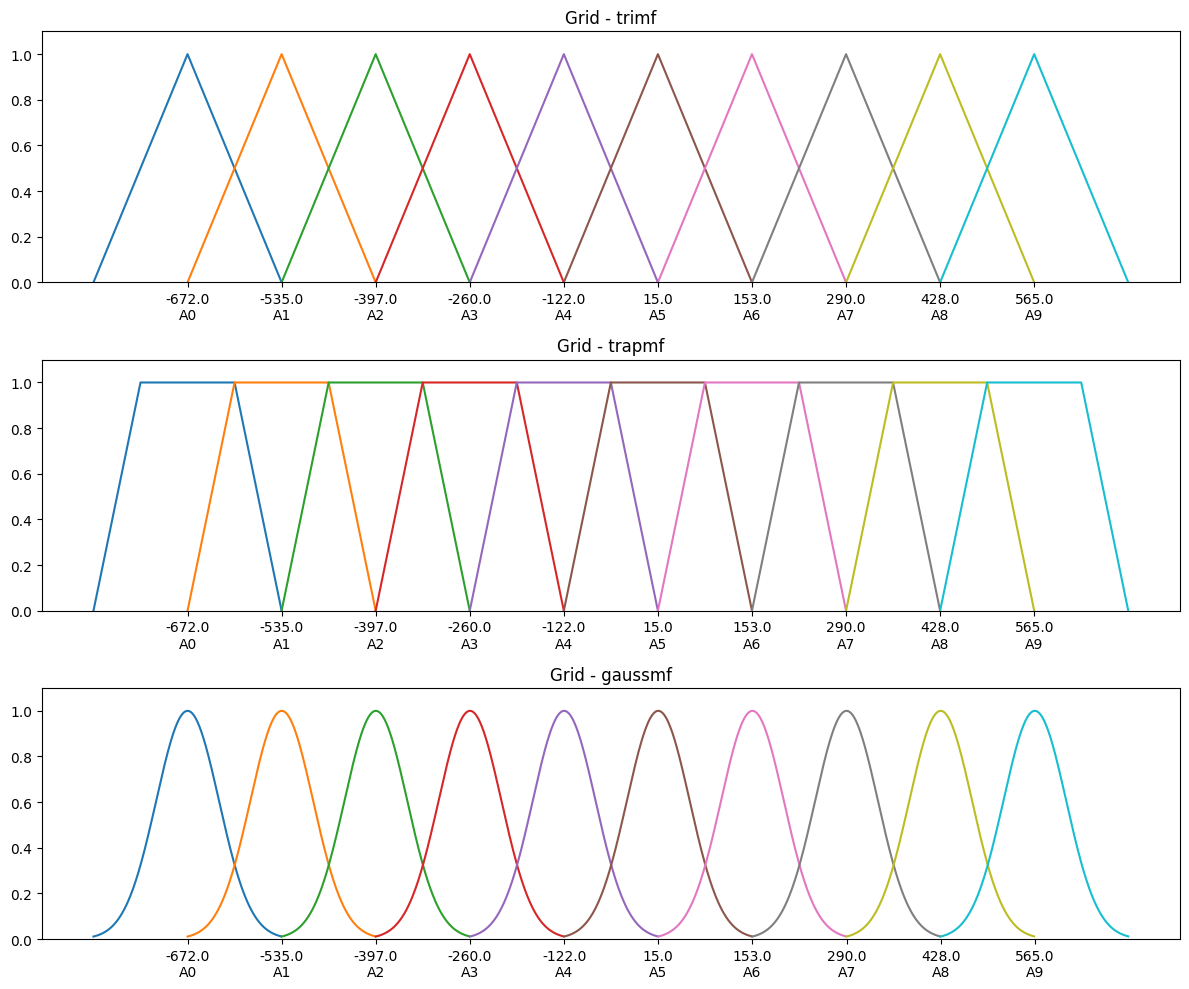

In [9]:
part = pUtil.explore_partitioners(dataset, 10, methods=[Grid.GridPartitioner], 
                                  mf=[mf.trimf, mf.trapmf, mf.gaussmf], transformation=tdiff)

In [10]:
# for p in part:
#     print(p)

### Several different mathods

In [13]:
# part = pUtil.explore_partitioners(dataset, 10, methods=[Huarng.HuarngPartitioner], 
#                                   mf=[mf.trimf], transformation=tdiff)

KeyboardInterrupt: 

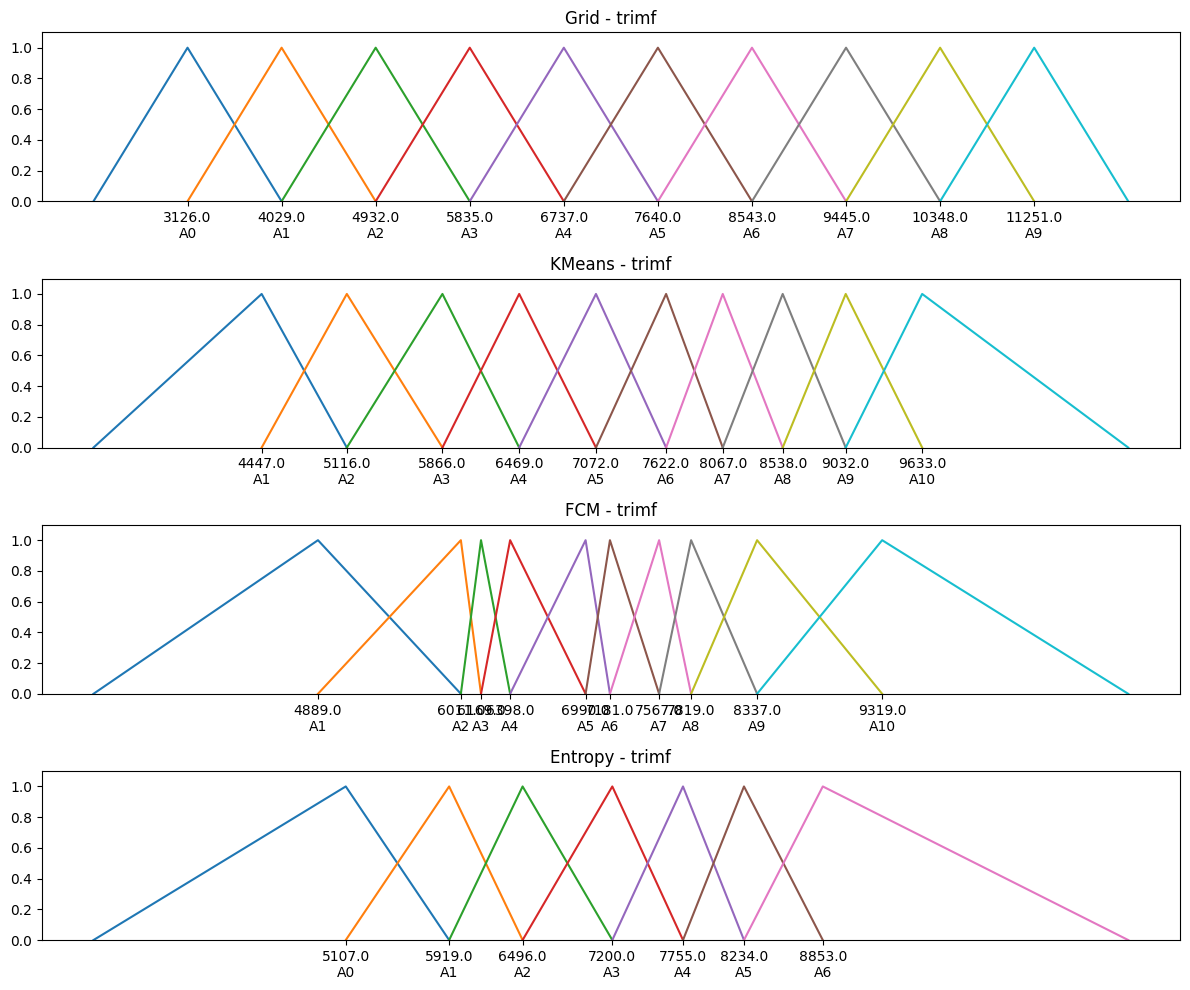

In [14]:
part = pUtil.explore_partitioners(dataset, 10, methods=[Grid.GridPartitioner, 
                                                        KMeans.KMeansPartitioner, 
                                                        FCM.FCMPartitioner,
                                                        Entropy.EntropyPartitioner], 
                                  mf=[mf.trimf])

In [15]:
for p in part:
    print(p)

Grid - trimf:
A0: trimf([2223.737111111111, 3126.4335, 4029.129888888889])
A1: trimf([3126.4335, 4029.129888888889, 4931.826277777778])
A2: trimf([4029.129888888889, 4931.826277777778, 5834.522666666668])
A3: trimf([4931.826277777778, 5834.522666666668, 6737.219055555557])
A4: trimf([5834.522666666668, 6737.219055555556, 7639.915444444445])
A5: trimf([6737.219055555557, 7639.915444444446, 8542.611833333334])
A6: trimf([7639.915444444445, 8542.611833333334, 9445.308222222224])
A7: trimf([8542.611833333332, 9445.308222222222, 10348.004611111111])
A8: trimf([9445.308222222222, 10348.004611111111, 11250.701000000001])
A9: trimf([10348.004611111111, 11250.701000000001, 12153.39738888889])

KMeans - trimf:
A1: trimf([3126.434, 4446.984, 5115.59])
A2: trimf([4446.984, 5115.59, 5866.252])
A3: trimf([5115.59, 5866.252, 6468.86])
A4: trimf([5866.252, 6468.86, 7071.561])
A5: trimf([6468.86, 7071.561, 7622.299])
A6: trimf([7071.561, 7622.299, 8067.048])
A7: trimf([7622.299, 8067.048, 8537.641])
A8